In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
ad=pd.read_csv("advertising.csv")
ad.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


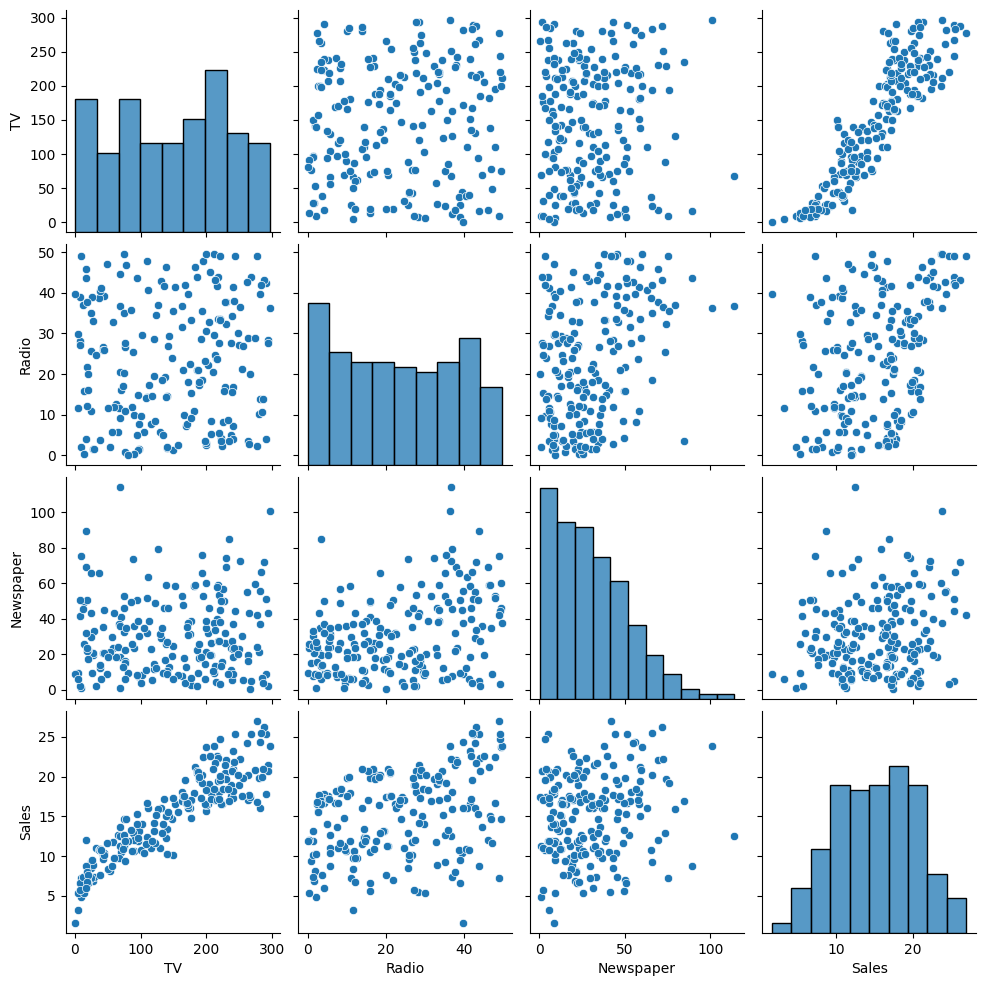

In [3]:
sns.pairplot(ad)
plt.show()

In [4]:
x=ad[['TV','Radio','Newspaper']]
y=ad['Sales']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
lr.coef_

array([ 0.05439222,  0.10151542, -0.00070258])

In [12]:
lr.intercept_

np.float64(4.830858826329965)

In [6]:
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)


MAE: 1.3929816421263603
MSE: 2.9362078869621526
RMSE: 1.7135366605247033
R2 Score: 0.9038011894307498


In [7]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': lr.coef_
})

print(coefficients)


     Feature  Coefficient
0         TV     0.054392
1      Radio     0.101515
2  Newspaper    -0.000703


In [8]:
print("Intercept:", lr.intercept_)


Intercept: 4.830858826329965


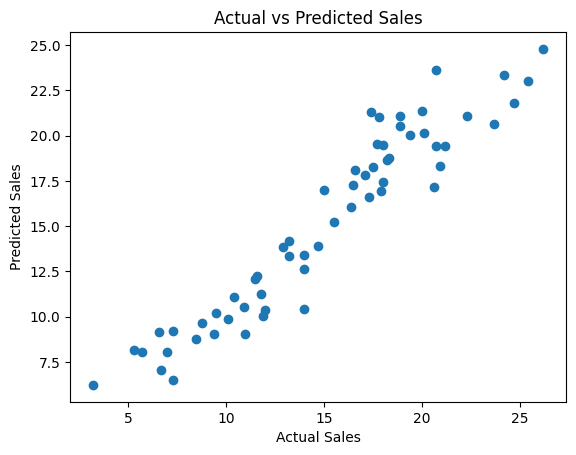

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [10]:
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [25],
    'Newspaper': [30]
})
predicted_sales = lr.predict(new_data)
print("Predicted Sales for new data:", predicted_sales)

Predicted Sales for new data: [15.50650004]


# Saving the model

In [13]:
import pickle

In [14]:
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [15]:
with open('linear_regression_model.pkl', 'rb') as f:
    lr = pickle.load(f)

# joblif if high number of numpy arrays

In [20]:
import joblib
joblib.dump(lr, 'linear_regression_model_joblib.pkl')

['linear_regression_model_joblib.pkl']